<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Sklearn/Module_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [230]:
data_path = '/content/gdrive/MyDrive/Data Science/HW-7'

In [231]:
data_path

'/content/gdrive/MyDrive/Data Science/HW-7'

# Helper functions

In [232]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
  data = np.loadtxt(filename, delimiter=',')
  X = data[:,:2]
  y = data[:,2]
  
  return X, y

def plot_data(X, y, pos_label='y=1', neg_label='y=0'):
  positive = y == 1
  negative = y == 0

  # Plot example
  plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
  plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


def plot_decision_boundery(weights, X, y, degree):
  u = np.linspace(20, 120, 100)
  v = np.linspace(20, 120, 100)

  decision_boundery = np.zeros((u.size, v.size))

  # Evaluate z = theta*x over the grid
  for i in range(0, u.size):
    for j in range(0, v.size):
      decision_boundery[i, j] = np.dot(map_feature(u[i], v[j], degree), weights)

  decision_boundery = decision_boundery.T

  # Plot z = 0
  # Notice you need to specify the range [0, 0]

  cs = plt.contour(u, v, decision_boundery, levels=[0], colors='r')
  cs.collections[0].set_label('Decision Boundary')



# Browsing Dataset

In [233]:
X, y = load_data(data_path + '/data.txt')

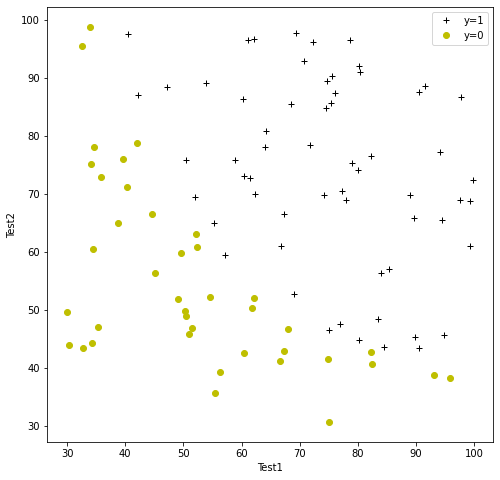

In [234]:
# Plot examples
plt.figure(figsize=(8,8))
plot_data(X,y)

plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(loc='upper right')
plt.show()

# Overfitting/Underfitting (Variance/Bias)

In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [236]:
classifier = LogisticRegression(penalty='none', fit_intercept = False, max_iter=1000)

$$x_1x_2,  x_1^2,  x_2^2, ..$$

In [237]:
def map_feature(x1, x2, degree):

  x1 = x1.reshape((x1.size, 1))
  x2 = x2.reshape((x2.size, 1))
  result = np.ones(x1[:, 0].shape)

  for i in range(1, degree + 1):
    for j in range(0, i + 1):
      result = np.c_[result, (x1**(i-j)) * (x2**j)]

  return result

In [238]:
DEGREE = 3

map_X = map_feature(X[:,0], X[:,1], DEGREE)

In [239]:
map_X.shape

(100, 10)

In [240]:
map_X[0]

array([1.00000000e+00, 3.46236596e+01, 7.80246928e+01, 1.19879781e+03,
       2.70150041e+03, 6.08785269e+03, 4.15067672e+04, 9.35358305e+04,
       2.10783739e+05, 4.75002836e+05])

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
map_X, y, test_size=0.20, random_state=42)

In [242]:
classifier.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=1000, penalty='none')

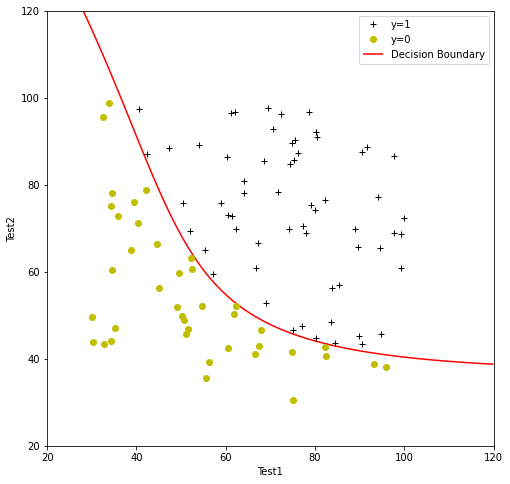

In [243]:
# Plot examples
plt.figure(figsize=(8,8))
plot_data(X, y)


plot_decision_boundery(classifier.coef_[0], X, y, DEGREE )

plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(loc='upper right')
plt.show()

In [244]:
classifier.score(X_train, y_train)

1.0

In [245]:
classifier.score(X_test, y_test)

1.0

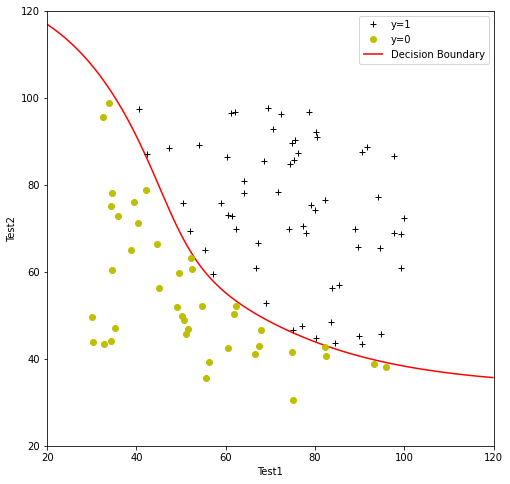

In [246]:
DEGREE = 6

map_X = map_feature(X[:,0], X[:,1], DEGREE)

X_train, X_test, y_train, y_test = train_test_split(
map_X, y, test_size=0.20, random_state=42)


classifier = LogisticRegression(penalty='none', fit_intercept = False, max_iter=5000)

classifier.fit(X_train, y_train)

# Plot examples
plt.figure(figsize=(8,8))
plot_data(X, y)


plot_decision_boundery(classifier.coef_[0], X, y, DEGREE )

plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(loc='upper right')
plt.show()

In [247]:
classifier.score(X_train, y_train)

1.0

In [248]:
classifier.score(X_test, y_test)

1.0

# Regularization

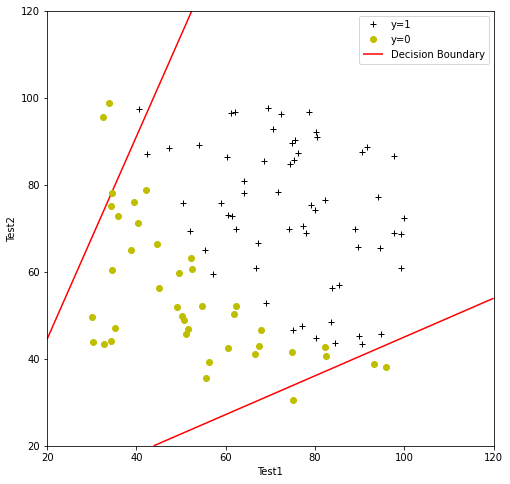

In [249]:
DEGREE = 6

map_X = map_feature(X[:,0], X[:,1], DEGREE)

X_train, X_test, y_train, y_test = train_test_split(
map_X, y, test_size=0.20, random_state=42)


classifier = LogisticRegression(penalty='l1', fit_intercept = False, max_iter=10000, solver='saga')

classifier.fit(X_train, y_train)

# Plot examples
plt.figure(figsize=(8,8))
plot_data(X, y)


plot_decision_boundery(classifier.coef_[0], X, y, DEGREE )

plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(loc='upper right')
plt.show()

In [250]:
classifier.coef_

array([[-4.75407802e-20, -2.40504960e-18, -2.50286105e-18,
        -1.15055778e-16, -1.08725332e-16, -1.23563767e-16,
        -5.46730527e-15, -4.70505908e-15, -4.88865243e-15,
        -6.02956481e-15, -2.43379160e-13, -1.91079717e-13,
        -1.82702086e-13, -2.06546120e-13, -2.74759254e-13,
        -8.54207091e-12, -6.00766285e-12, -5.39959731e-12,
        -5.68659349e-12, -6.81191658e-12, -9.82660578e-12,
        -1.26597959e-11,  2.65800871e-11,  7.04196323e-12,
        -8.33637858e-12, -3.09112558e-12,  1.89604302e-11,
        -7.46151596e-12]])

In [251]:
classifier.score(X_train, y_train)

0.6375

In [252]:
classifier.score(X_test, y_test)

0.65

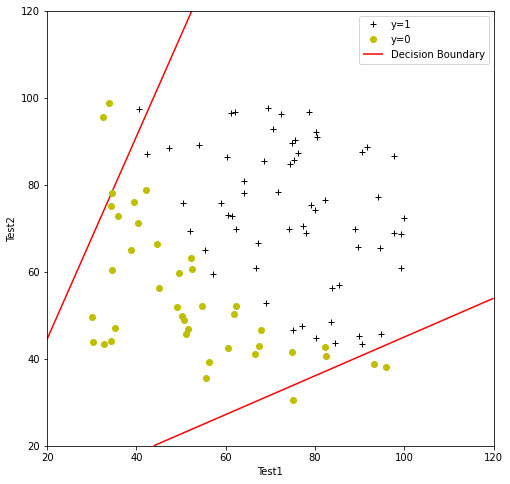

In [253]:
DEGREE = 6

map_X = map_feature(X[:,0], X[:,1], DEGREE)

X_train, X_test, y_train, y_test = train_test_split(
map_X, y, test_size=0.20, random_state=42)


classifier = LogisticRegression(penalty='elasticnet', fit_intercept = False, max_iter=10000, solver='saga', l1_ratio=0.5)

classifier.fit(X_train, y_train)

# Plot examples
plt.figure(figsize=(8,8))
plot_data(X, y)


plot_decision_boundery(classifier.coef_[0], X, y, DEGREE )

plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(loc='upper right')
plt.show()

In [254]:
classifier.coef_

array([[-4.96904831e-20, -2.40917044e-18, -2.50716110e-18,
        -1.15152467e-16, -1.08821491e-16, -1.23676635e-16,
        -5.47172478e-15, -4.70908756e-15, -4.89301404e-15,
        -6.03508849e-15, -2.43572153e-13, -1.91241716e-13,
        -1.82864389e-13, -2.06735798e-13, -2.75015928e-13,
        -8.54867871e-12, -6.01275477e-12, -5.40439206e-12,
        -5.69183258e-12, -6.81838995e-12, -9.83594770e-12,
        -1.26629706e-11,  2.65890058e-11,  7.04168183e-12,
        -8.34414648e-12, -3.09603969e-12,  1.89698729e-11,
        -7.46390483e-12]])

In [255]:
classifier.score(X_train, y_train)

0.6375

In [256]:
classifier.score(X_test, y_test)

0.65